# Data Description

In [74]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [75]:
# importing train ans set data from the excel files and storing them as Dataframes.
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [76]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [77]:
df.shape

(10683, 11)

In [78]:
df_test.shape

(2671, 10)

In [79]:
# info on the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Only Numerical column in dataset is Price. Rest all are Object Datatypes

In [80]:
# description od both the datasets

In [81]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [82]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Missing Values in Dataset

In [83]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

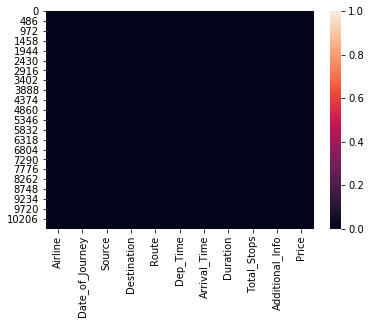

In [84]:
sns.heatmap(df.isna())

We see that there are no null values in dataset

# Correlation

In [85]:
df.corr()

,Price
Price,1.0


In [86]:
# Converting Date OF Journey into Day, Date and Month of Journey

df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [87]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


drop the data of journey column as the required features are extracted.

In [88]:
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [89]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


### Convertig Duration into minutes

In [90]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_Day      10683 non-null  int64 
 11  Journey_Month    10683 non-null  int64 
 12  weekday          10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [92]:
import re

df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])

df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)

df.Duration = df.Mintues.astype('int') + df.Duration

In [93]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,6,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882,9,6,6,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,6,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,4,45


In [94]:
df.drop(labels='Mintues', axis=1, inplace=True)

In [95]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,4


In [96]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [97]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1 stop,No info,13302,1,3,4


In [98]:
# Converting total_stops to 0,1,2,3 respectively
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)



pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [99]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,3,4


In [100]:
# mapping the month number with their respective names.


df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) 

In [101]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,March,4


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  int64 
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_Day      10683 non-null  int64 
 11  Journey_Month    10683 non-null  object
 12  weekday          10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  int64 
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_Day      10683 non-null  int64 
 11  Journey_Month    10683 non-null  object
 12  weekday          10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [104]:
df1 =df.copy() 


In [105]:
# Dropping Redundant Columns

df=df.drop(['Arrival_Time'], axis=1) #this columns has no such effect on fare price

df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops


In [106]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302,1,March,4


# Correlation

In [107]:
df.corr()

,Duration,Price,Journey_Day,weekday
Duration,1.000000,0.506607,-0.022481,-0.013133
Price,0.506607,1.000000,-0.153738,0.051613
Journey_Day,-0.022481,-0.153738,1.000000,-0.091111
weekday,-0.013133,0.051613,-0.091111,1.000000


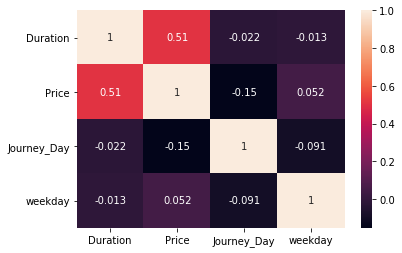

In [108]:
sns.heatmap(df.corr(),annot=True)

We see that price and Duration are 50% correlated

# Univariate Analysis

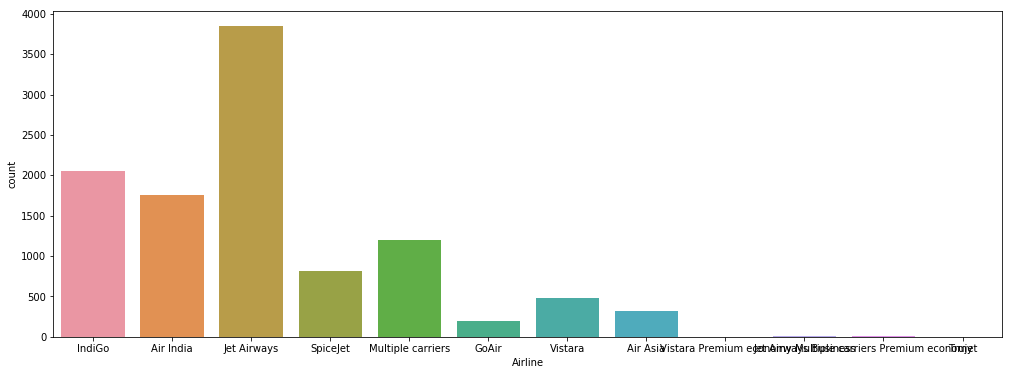

In [109]:
plt.figure(figsize=(17,6))
sns.countplot(df.Airline)

In [110]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [111]:
df.shape

(10683, 11)

In [112]:
#Jet Airways, Indigo & Air India Covers More than 70% of the Airlines

In [113]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

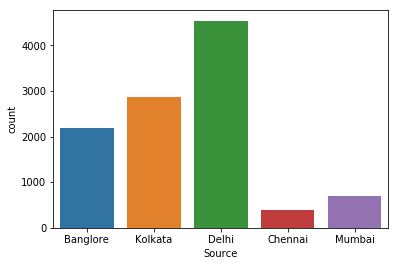

In [114]:
sns.countplot(df.Source)

We see that majority of flights Depart or Source is from Delhi and least Source is Chennai

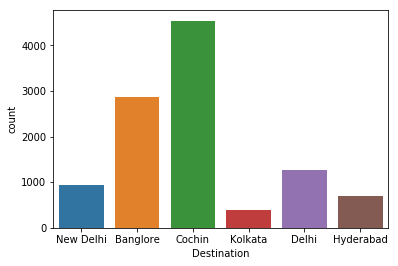

In [115]:
sns.countplot(df.Destination)

We see that majority of flights destination is Cochin and then Bangalore

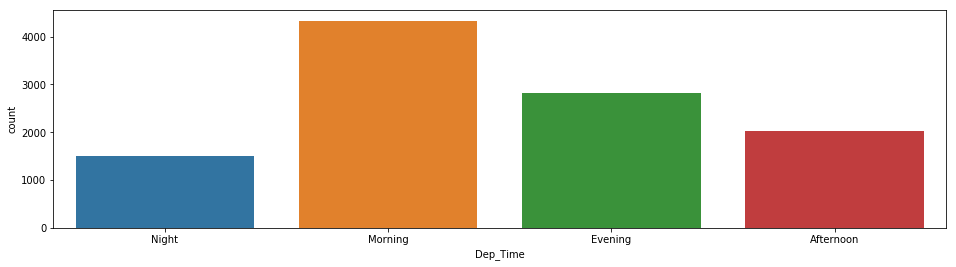

In [116]:
figure_this_size(16,4)
sns.countplot(df.Dep_Time)

We see that majority of flights are Morning Flights

People are not prefering Night Travel! We may find that reason in bivariate analysis

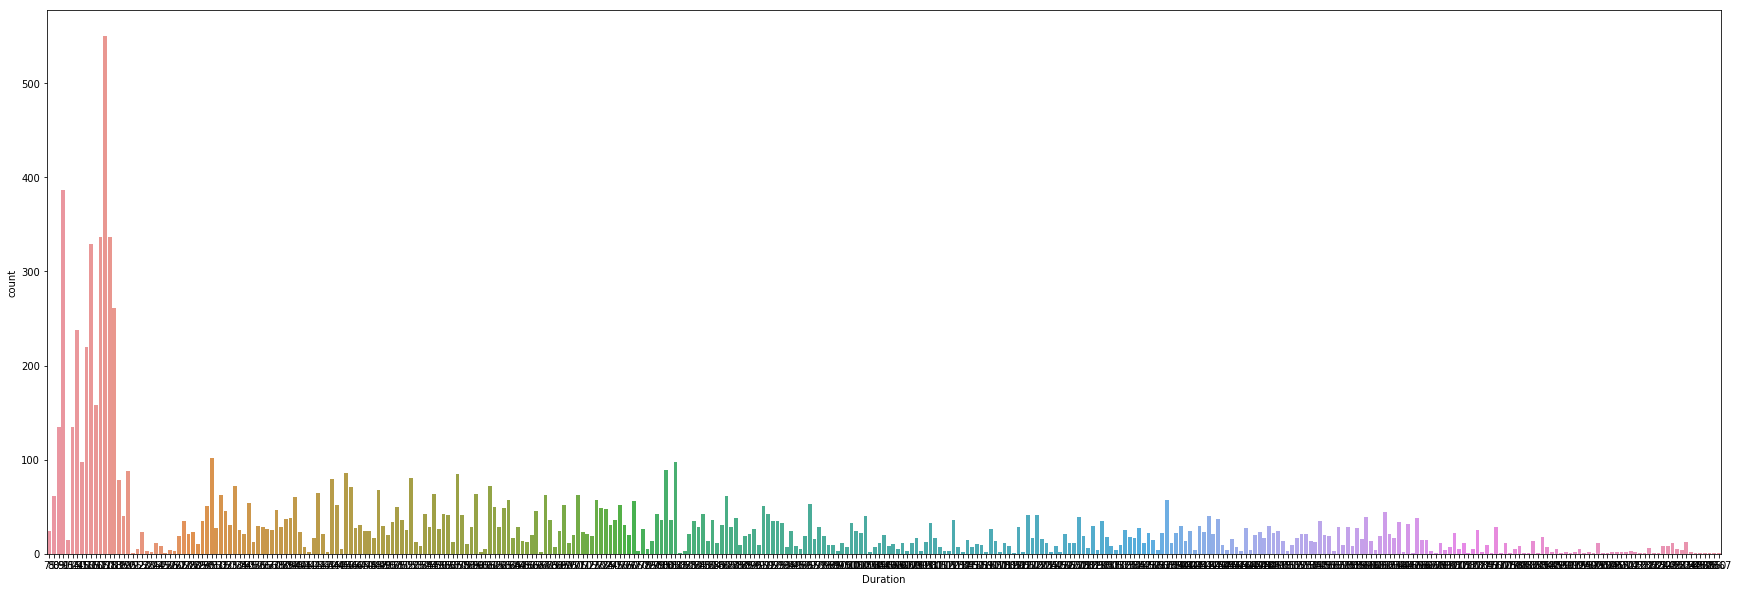

In [117]:
figure_this_size(30,10)
sns.countplot(df.Duration)

In [118]:
df.Duration.value_counts()

170     550
90      386
175     337
165     337
155     329
       ... 
1780      1
2565      1
2525      1
1675      1
1975      1
Name: Duration, Length: 361, dtype: int64

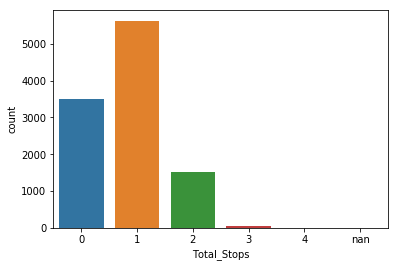

In [119]:
sns.countplot(df.Total_Stops)

We see that majority flights have 1 stop and then there are non stop flights

In [120]:
df.Total_Stops.value_counts()

1      5625
0      3491
2      1520
3        45
4         1
nan       1
Name: Total_Stops, dtype: int64

In [121]:
#More than 50% of people prefers 1stop Travel

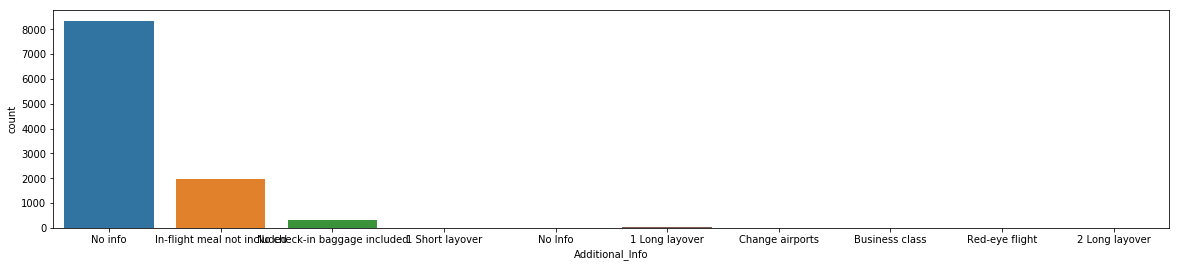

In [122]:
figure_this_size(20,4)
sns.countplot(df.Additional_Info)

In [123]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Around 78% rows of Additional_Info has no info, that means either the data is misssing or the travellers dont take additional services

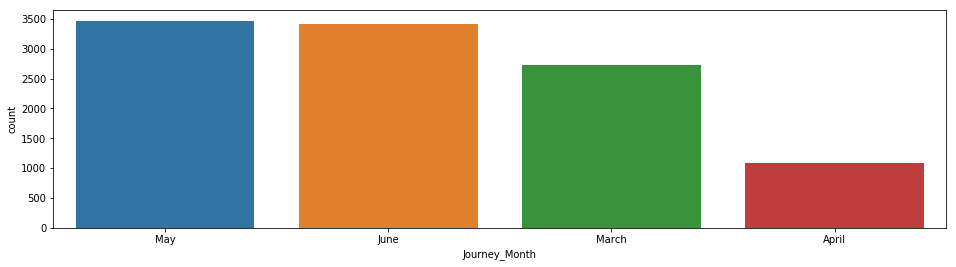

In [124]:
figure_this_size(16,4)
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)

Least amount of the ticket bookings had been done in the month of April and maximum during May and June due to Summer Break

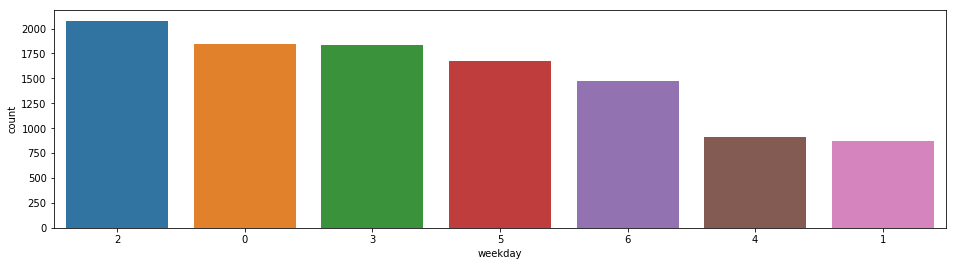

In [125]:
figure_this_size(16,4)
sns.countplot(df.weekday,order=df.weekday.value_counts().index)

# Multi-variate Analysis


In [126]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302,1,March,4


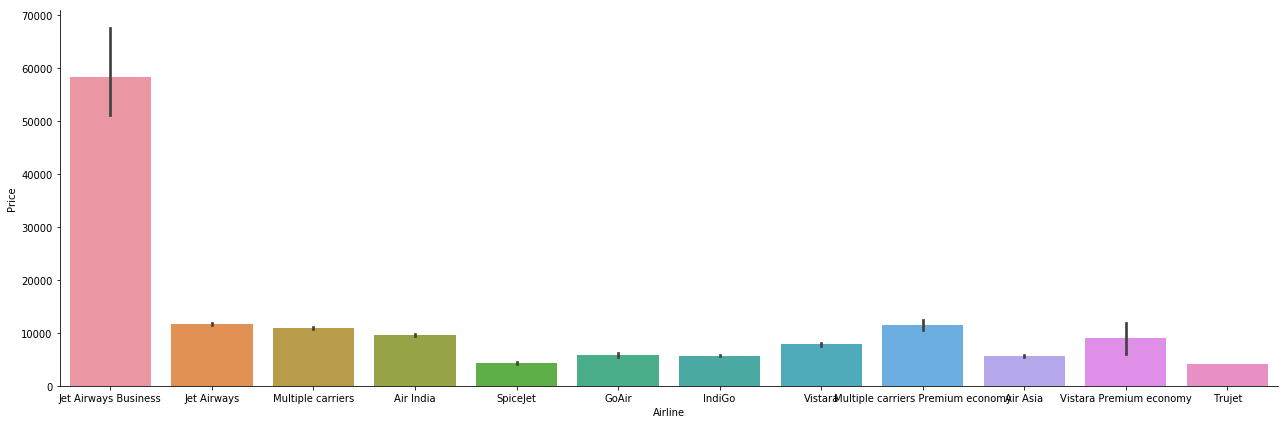

In [127]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

Jet Airways Business Airline has the highest price apart from the first airline almost all are having similar median, maybe because of their services that they provide to their customers

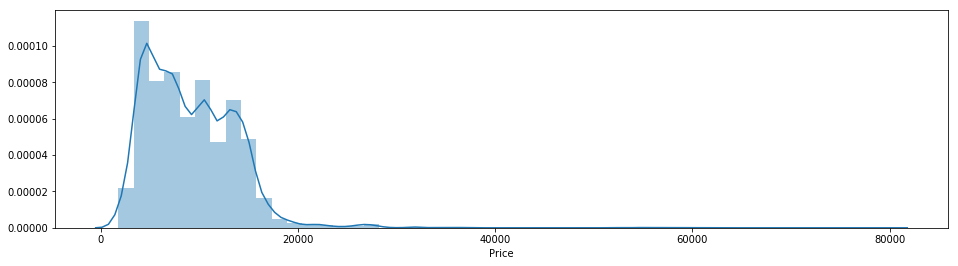

In [128]:
# Looking at Price distribution
figure_this_size(16,4)
sns.distplot(df['Price'])
plt.show()

In [129]:
df.groupby(['Journey_Month']).mean()

,Duration,Price,Journey_Day,weekday
Journey_Month,,,,
April,378.870250,5770.847081,11.192771,2.265060
June,653.134153,8828.796134,12.254833,3.052431
March,684.697871,10673.205580,13.924376,3.523128
May,686.242931,9127.247548,15.137046,2.565205


We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

In [130]:
df.groupby(['weekday']).mean()

,Duration,Price,Journey_Day
weekday,,,
0,623.352432,8499.530811,13.961622
1,653.741082,9026.149597,17.440736
2,682.166907,9277.514190,12.167869
3,708.115175,8931.379367,14.764192
4,473.796480,9717.996700,14.090209
5,630.251497,8972.905389,12.089820
6,652.808684,9525.508820,12.199457


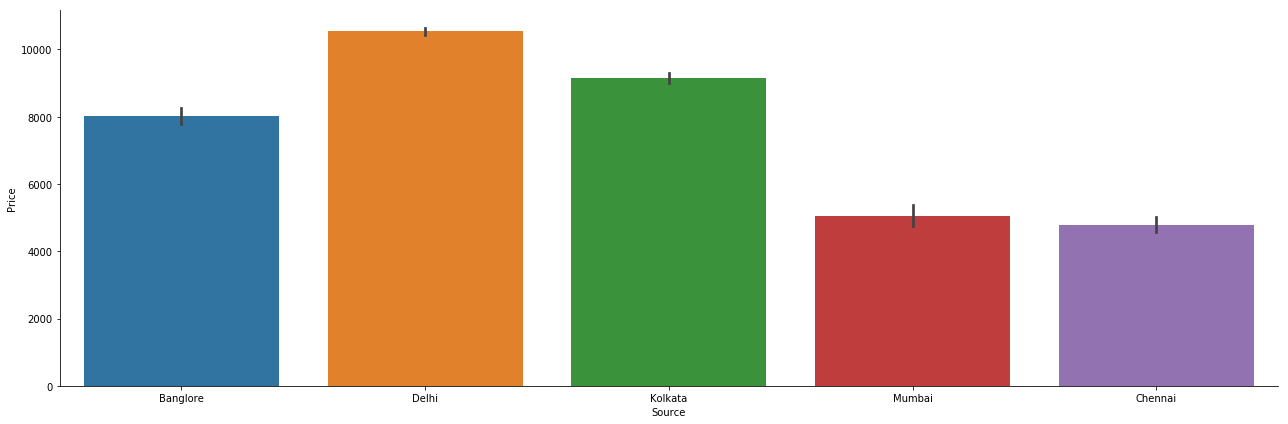

In [131]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

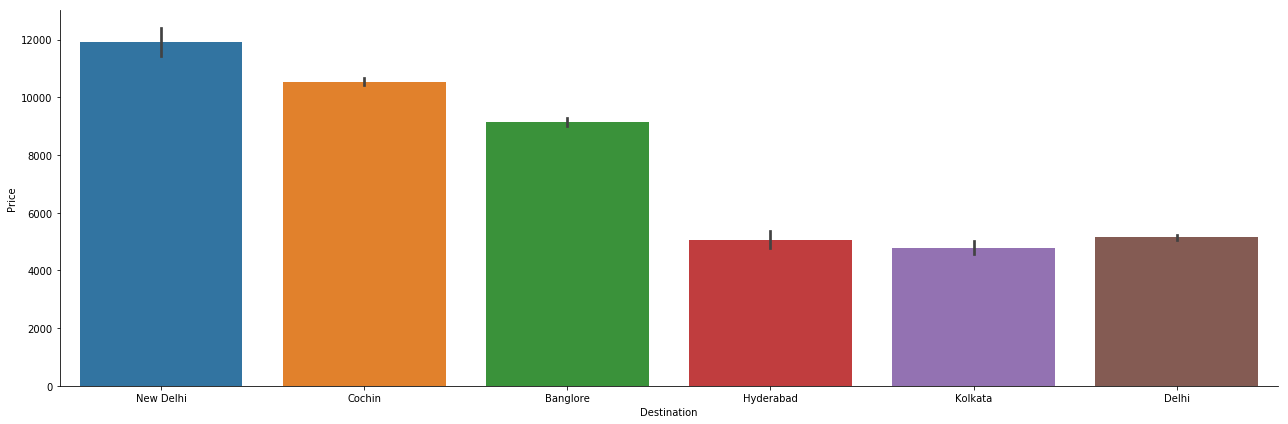

In [132]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

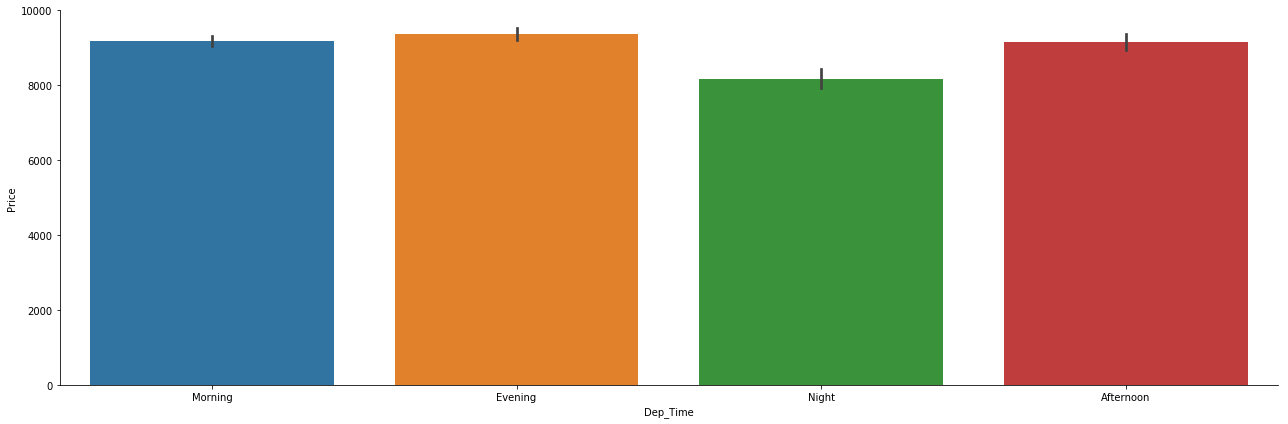

In [133]:
# Destination vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

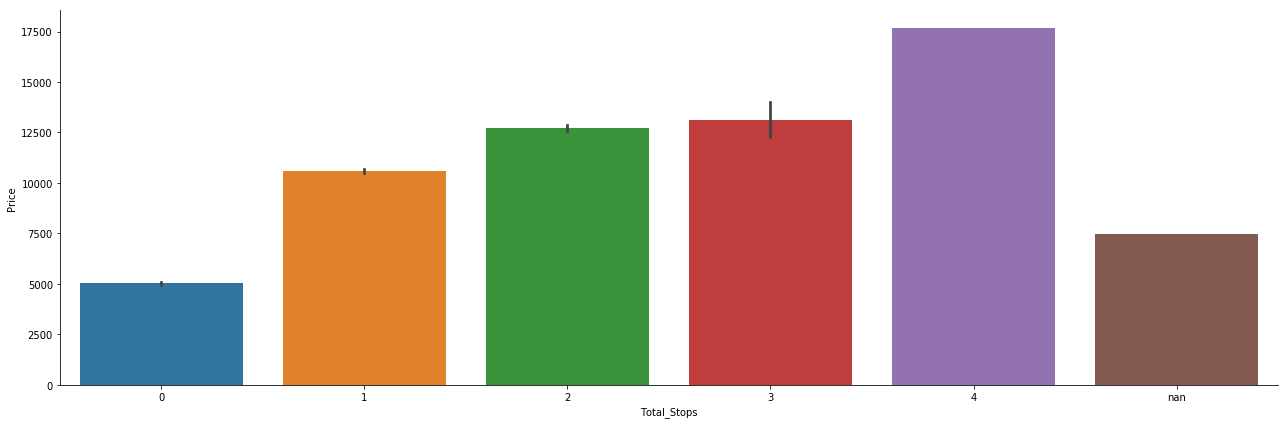

In [134]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

In [135]:
# As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

In [143]:
df=df.drop('Additional_Info',axis=1)

In [144]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,170,0,3897,24,2,6
1,1,3,0,2,445,2,7662,1,3,2
2,4,2,1,2,1159,2,13882,9,1,6
3,3,3,0,1,325,1,6218,12,3,6
4,3,0,5,1,285,1,13302,1,2,4


##  Encoding the data

In [145]:
# As all these values are in String type, therefore we have to convert them to numeric data type, so we will use Label Encoder
cols=['Airline', 'Source', 'Destination', 'Dep_Time', 'Journey_Month','Total_Stops']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols: 
    df[i]=le.fit_transform(df[i]) 
    

In [146]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,170,0,3897,24,2,6
1,1,3,0,2,445,2,7662,1,3,2
2,4,2,1,2,1159,2,13882,9,1,6
3,3,3,0,1,325,1,6218,12,3,6
4,3,0,5,1,285,1,13302,1,2,4


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        10683 non-null  int64
 1   Source         10683 non-null  int64
 2   Destination    10683 non-null  int64
 3   Dep_Time       10683 non-null  int64
 4   Duration       10683 non-null  int64
 5   Total_Stops    10683 non-null  int64
 6   Price          10683 non-null  int64
 7   Journey_Day    10683 non-null  int64
 8   Journey_Month  10683 non-null  int64
 9   weekday        10683 non-null  int64
dtypes: int64(10)
memory usage: 834.7 KB


In [148]:
#Checking again for Missing Values
df.isna().sum()

Airline          0
Source           0
Destination      0
Dep_Time         0
Duration         0
Total_Stops      0
Price            0
Journey_Day      0
Journey_Month    0
weekday          0
dtype: int64

There are no missing values in Dataset

# Removing outliers from the train dataset.

In [149]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(10683, 10)

In [150]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   826,   919,   936,   946,   959,   966,   975,
        1067,  1113,  1196,  1218,  1246,  1341,  1346,  1424,  1442,
        1466,  1478,  1496,  1551,  1629,  1654,  1657,  1665,  1785,
        1791,  1804,  1918,  2055,  2099,  2108,  2172,  2172,  2495,
        2553,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2924,  3032,  3111,  3157,  3220,
        3257,  3317,  3400,  3496,  3535,  3568,  3584,  3700,  3790,
        3815,  3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,
        4463,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5050,
        5136,  5372,  5439,  5446,  5662,  5701,  5701,  5710,  5711,
        5719,  5738,  5745,  5838,  5856,  5933,  5947,  5953,  5986,
        5996,  6059,  6085,  6314,  6321,  6407,  6444,  6476,  6576,
        6588,  6599,  6605,  6884,  6884,  6991,  7001,  7031,  7189,
        7232,  7249

In [151]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(10683, 10)
(10494, 10)


In [152]:
# Percent Data Loss
loss_percent=((10683-10494)/10683)*100
loss_percent

1.7691659646166806

We see that data loss is very less so we will remove the outliers

As Data has majority categorical data, so we can't remove skewness of data

## x and y split

In [153]:
x = df1.drop('Price',1)
y = df1['Price']

# Finding Best Random State

In [154]:
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.5381677753626344 on Random_State 96


We will use Random_state value=96

## Train and Validation split

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=96)

In [157]:
# checking the shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8395, 9), (8395,), (2099, 9), (2099,))

# Training the model

In [158]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [159]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mscore=m.score(x_train,y_train)
    print('Score;', mscore)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Score; 0.5012810959799912
Mean Absolute error: of LinearRegression()
2163.8129754566826
Mean Squared error: of LinearRegression()
7519511.474529301
Root Mean Squared error: of LinearRegression()
2742.1727652592026
r2 score: of LinearRegression()
0.5381677753626344
Cross Validation Score: 0.5074518667310504
Difference Between r2_score and CrossValidation Score: 0.03071590863158402


Score; 0.5012810395351499
Mean Absolute error: of Ridge()
2163.7965579680076
Mean Squared error: of Ridge()
7519419.025369966
Root Mean Squared error: of Ridge()
2742.1559082900385
r2 score: of Ridge()
0.5381734533911959
Cross Validation Score: 0.5074520759939674
Difference Between r2_score and CrossValidation Score: 0.030721377397228578


Score; 0.5012805023681133
Mean Absolute error: of Lasso()
2163.776915694412
Mean Squared error: of Lasso()
7519327.804607864
Root Mean Squared error: of Lasso()
2742.1392752024585
r2 score: of Lasso()
0.538179055974241
Cross Validation Score: 0.5074559356023358
Difference 

Random Forest Regressor is giving us the best crossval reults.

In [160]:
best_model = RandomForestRegressor()

In [161]:
best_model.fit(x_train,y_train)

RandomForestRegressor()

In [162]:
best_model.score(x_test,y_test)

0.7815792466625813

## Saving the model

In [163]:
import joblib
joblib.dump(best_model,'flight_price.obj')

['flight_price.obj']